# RQ3

**1. What is the most common time in which users publish their posts?**


**2. Create a function that receives a time intervals list as a parameter and returns a plot with the number of posts for each given interval.**


**3. Use the function that you created in the previous literal to plot the number of posts between the following time intervals:**


||Initial Time|Final Time|
|---|---|---|
| 1 | 06:00:00 | 10:59:59 |
| 2 | 11:00:00 |  13:59:59|
| 3 | 14:00:00 |  16:59:59|
| 4 | 17:00:00 |  19:59:59|
| 5 | 20:00:00 | 23:59:59|
| 6 | 00:00:00 | 02:59:59|
| 7 | 03:00:00 | 05:59:59|
|...|||

# 3.1 

In [1]:
import pandas as pd

In [2]:
posts =  pd.read_csv("C:/Users/Winuser/Desktop/ADM_HW2/instagram_posts.zip",delimiter="\t",usecols=["post_id", "cts"])#Increase up to len of dataframe

**Body of 3.1**

In [5]:
posts.isna().sum()
posts.dropna()

,post_id,cts
0,BXdjjUlgcgq,2017-08-06 20:06:57.000
1,BVg0pbolYBC,2017-06-19 09:31:16.000
2,BRgkjcXFp3Q,2017-03-11 20:05:03.000
3,BKTKeNhjEA7,2016-09-13 16:27:16.000
4,8-NQrvoYLX,2015-10-18 10:19:27.000
...,...,...
42710192,BcpWMWGBfxh,2017-12-13 15:38:04.000
42710193,Ba6LZWwlCl8,2017-10-31 11:28:01.000
42710194,BPN0kM1hYUw,2017-01-13 20:16:37.000
42710195,BxsZ8nDBr-L,2019-05-20 20:07:52.000


**Convert to datetime and keeping only the hour:minute:second**

In [6]:
posts['cts'] = pd.to_datetime(posts.cts).dt.time

**STEP 1: Selecting only cts and post_id columns**


**STEP 2: Counting each row grouped by cts**

In [7]:
counter = posts.groupby('cts').post_id.count()

In [8]:
counter

cts
00:00:00    470
00:00:01    570
00:00:02    538
00:00:03    555
00:00:04    565
           ... 
23:59:55    496
23:59:56    487
23:59:57    488
23:59:58    469
23:59:59    491
Name: post_id, Length: 86400, dtype: int64

**Calculating Maximum count of post**

In [9]:
maximum  = max(counter)
print(maximum)
result =  counter[counter == maximum]


928


**Returning the cts value corresponding to the maximum**

In [10]:
output  = str(result).replace("\n"," ")

output  = output[4:12]
print("The most common time in which users publish their posts is: ")
output

The most common time in which users publish their posts is: 


'21:00:09'

# 3.2

In [11]:
from collections import defaultdict
import matplotlib.pyplot as plt
from datetime import datetime

**time_interval(time_list,posts) takes as input a list of time intervals = time_list which its elements is a list of two datetime.time object. This two datetime.time objects delimit the interval.
The second input is the posts_dataframe.
Please use posts_cts_manager to cast every entries in posts_dataframe['cts'] column in the right object type(datatime.time)**

In [24]:
def posts_cts_manager(post_dataframe):
    posts_dataframe['cts'] = pd.to_datetime(posts_dataframe.cts).dt.time

def time_interval(time_list,posts):
    counter  = defaultdict()
    for time in time_list:
        interval = time[0].strftime("%H:%M:%S")+" "+time[1].strftime("%H:%M:%S")
        counter[interval] = 0
        for date in posts['cts']:
            if( type(time[0])== type(date) and time[0]<= date and time[1]>=date):
                counter[interval] += 1
    plt.figure(figsize=(10,10))
    hist  = plt.bar(range(len(list(counter.keys()))), counter.values(), color='g',width=.3)
    i= 0
    for key in counter.keys():
        print( "Interval "+str(i)+" = "+key)
        i+=1
    return hist

# 3.3


**The code counts the number of posts published in each time interval given as input and plots the frequencies
in a histogram**

**The code calls time_interval function written above**


Interval 0 = 06:00:00 10:59:59
Interval 1 = 11:00:00 13:59:59
Interval 2 = 14:00:00 16:59:59
Interval 3 = 17:00:00 19:59:59
Interval 4 = 20:00:00 23:59:59
Interval 5 = 00:00:00 02:59:59
Interval 6 = 03:00:00 05:59:59


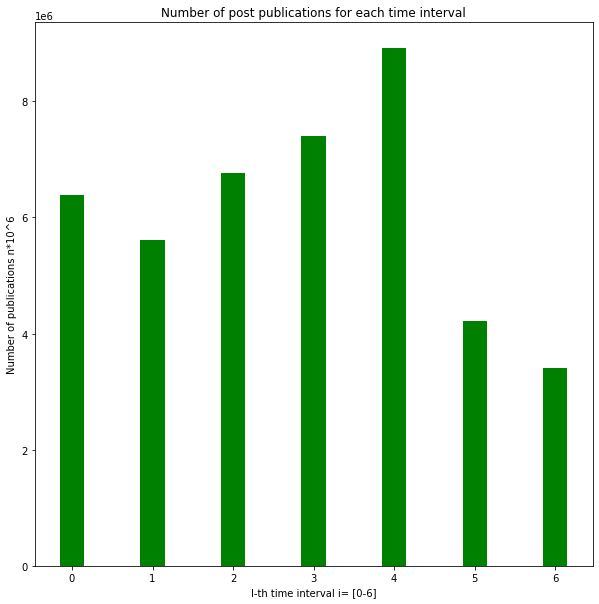

In [26]:
input_t = [['06:00:00','10:59:59'],['11:00:00','13:59:59'],['14:00:00','16:59:59'],['17:00:00', '19:59:59'],['20:00:00','23:59:59'],['00:00:00','02:59:59'],['03:00:00','05:59:59']]
time_list = []
for interval in input_t:
    row  = []
    row.append(datetime.strptime(interval[0], '%H:%M:%S').time())
    row.append(datetime.strptime(interval[1],'%H:%M:%S').time())
    time_list.append(row)
time_interval(time_list,posts)
plt.title("Number of post publications for each time interval")
plt.ylabel("Number of publications n*10^6")
plt.xlabel("I-th time interval i= [0-6]")
plt.show()

**Users have the tendency to post more in the time interval between 20-00 than in every other time interval we gave as input to the make the plot. Also the most common time in which users publish a post falls inside the time interval with the most publications.**

**In fact there are more that 8 million publications in the time between 20-00.**